# GARCH Stock Forecasting

## Read Data

In [22]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

## Stock Volatility

In [43]:
start = datetime(2015, 1, 1)
end = datetime(2024, 8, 21)

In [44]:
stock = yf.download('AMD', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [45]:
returns = 100 * stock.Close.pct_change().dropna()

Text(0.5, 1.0, 'Stock Returns')

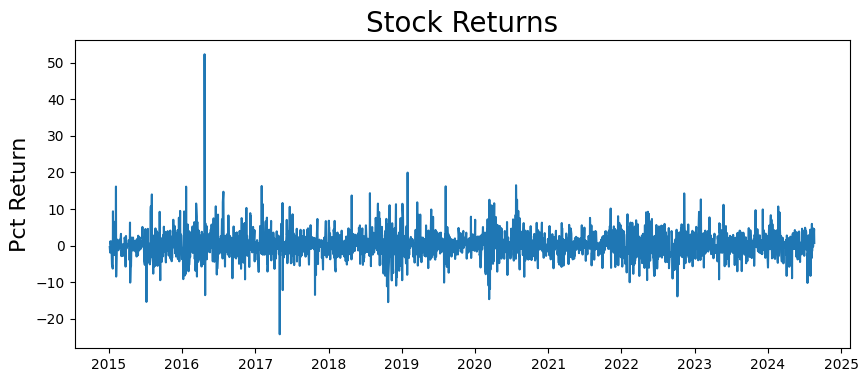

In [46]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Stock Returns', fontsize=20)

## PACF

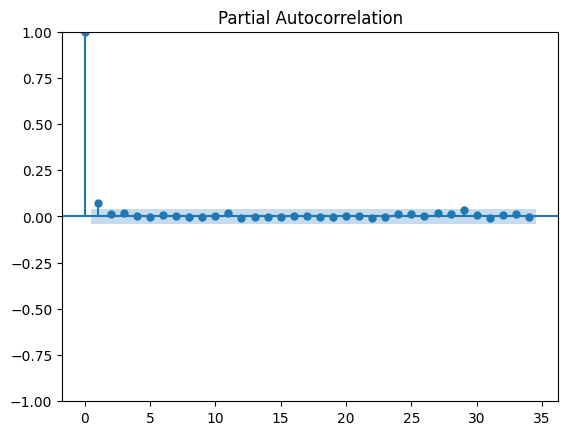

In [47]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [48]:
model = arch_model(returns, p=3, q=3)

In [49]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9568.229602888481
Iteration:      2,   Func. Count:     21,   Neg. LLF: 6888.873498716157
Iteration:      3,   Func. Count:     31,   Neg. LLF: 77584.13008843984
Iteration:      4,   Func. Count:     41,   Neg. LLF: 6904.116967504086
Iteration:      5,   Func. Count:     52,   Neg. LLF: 6567.93239205509
Iteration:      6,   Func. Count:     62,   Neg. LLF: 6733.399319131782
Iteration:      7,   Func. Count:     73,   Neg. LLF: 6571.174531132357
Iteration:      8,   Func. Count:     83,   Neg. LLF: 6615.345846124203
Iteration:      9,   Func. Count:     94,   Neg. LLF: 6555.452702236596
Iteration:     10,   Func. Count:    103,   Neg. LLF: 6555.410233641382
Iteration:     11,   Func. Count:    112,   Neg. LLF: 6555.401145655821
Iteration:     12,   Func. Count:    121,   Neg. LLF: 6555.400602879772
Iteration:     13,   Func. Count:    130,   Neg. LLF: 6555.400579013074
Iteration:     14,   Func. Count:    139,   Neg. LLF: 6555.400578

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6555.40
Distribution:                  Normal   AIC:                           13126.8
Method:            Maximum Likelihood   BIC:                           13173.1
                                        No. Observations:                 2423
Date:                Sun, Aug 25 2024   Df Residuals:                     2422
Time:                        17:18:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2937  9.391e-02      3.127  1.765e-03 [  0.110,  0.478]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          7.8573      4.443      1.768  7.699e-02    [ -0.851, 16.566]
alpha[1]       0.1237  3.836e-02      3.225  1.258e-03  [4.854e-02,  0.199]
alpha[2]       0.0695  5.918e-02      1.175      0.240 [-4.646e-02,  0.186]
alpha[3]       0.1981      0.195      1.013      0.311    [ -0.185,  0.581]
beta[1]        0.0000      0.106      0.000      1.000    [ -0.207,  0.207]
beta[2]    2.0192e-13      0.589  3.428e-13      1.000    [ -1.155,  1.155]
beta[3]        0.0934      0.209      0.448      0.654    [ -0.315,  0.502]
===========================================================================

Covariance estimator: robust
"""

## Try Different Model

In [51]:
model = arch_model(returns, p=2, q=0)

In [52]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9633.888515401037
Iteration:      2,   Func. Count:     14,   Neg. LLF: 13816.210867820633
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6626.567181168073
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2918459.5686613456
Iteration:      5,   Func. Count:     34,   Neg. LLF: 6673.132731862577
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6669.266906478006
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6588.071486037083
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6587.963536806023
Iteration:      9,   Func. Count:     57,   Neg. LLF: 6587.9571268584605
Iteration:     10,   Func. Count:     62,   Neg. LLF: 6587.956807622295
Iteration:     11,   Func. Count:     66,   Neg. LLF: 6587.956807622246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6587.956807622295
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations:

In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6587.96
Distribution:                  Normal   AIC:                           13183.9
Method:            Maximum Likelihood   BIC:                           13207.1
                                        No. Observations:                 2423
Date:                Sun, Aug 25 2024   Df Residuals:                     2422
Time:                        17:18:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2742  8.632e-02      3.176  1.494e-03 [  0.105,  0.443]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.0122      1.289      8.542  1.319e-17    [  8.485, 13.539]
alpha[1]       0.1445  5.125e-02      2.820  4.803e-03  [4.407e-02,  0.245]
alpha[2]       0.0876  5.992e-02      1.462      0.144 [-2.986e-02,  0.205]
===========================================================================

Covariance estimator: robust
"""

In [54]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [55]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-252:])

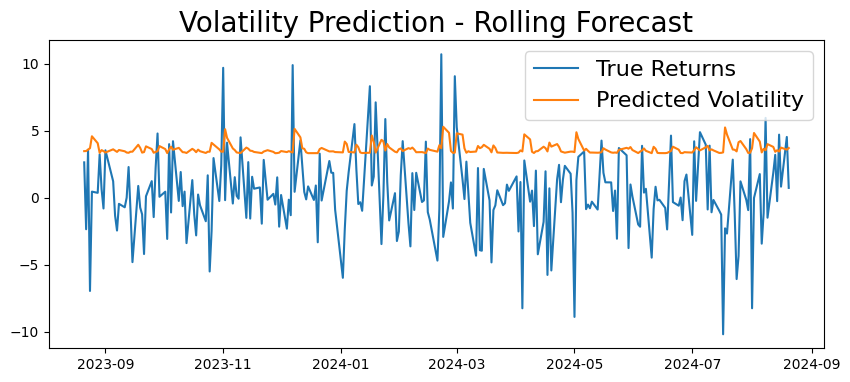

In [56]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-252:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Using the model

In [57]:
train = returns
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')

In [58]:
pred = model_fit.forecast(horizon=35)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,36)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

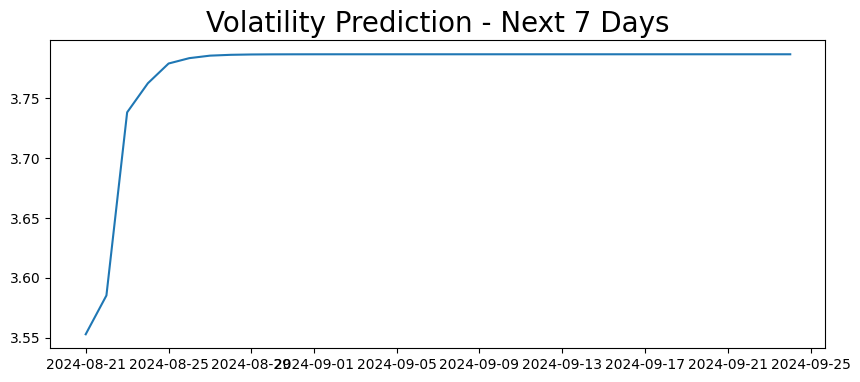

In [59]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

# Volatility Forecast as an Annualized Percentage

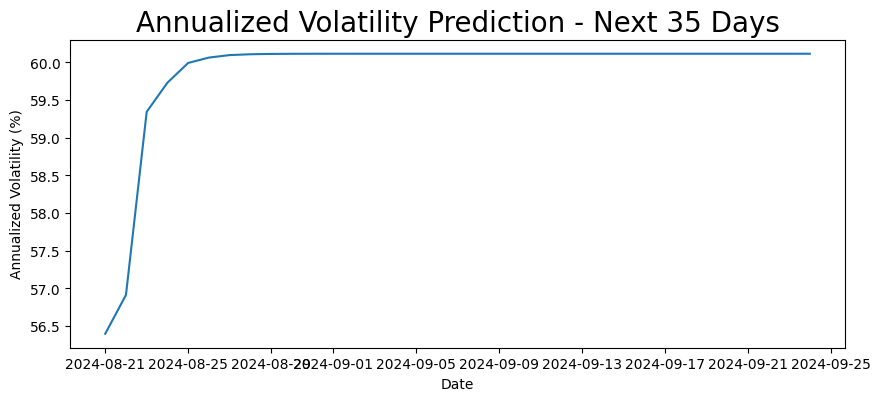

In [60]:
# Define the number of days to forecast
x_days = 35

# Fit the model on the entire data
model = arch_model(returns, p=2, q=0)
model_fit = model.fit(disp='off')

# Forecast volatility for the next x days
pred = model_fit.forecast(horizon=x_days)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1, x_days + 1)]

# Calculate daily volatility and then annualize it 
daily_volatility = np.sqrt(pred.variance.values[-1, :])
annualized_volatility = daily_volatility * np.sqrt(252)   

# Create a pandas Series for the forecasted volatility
annualized_volatility_series = pd.Series(annualized_volatility, index=future_dates)

# Plot the annualized volatility as a percentage
plt.figure(figsize=(10, 4))
plt.plot(annualized_volatility_series)
plt.title(f'Annualized Volatility Prediction - Next {x_days} Days', fontsize=20)
plt.ylabel('Annualized Volatility (%)')
plt.xlabel('Date')
plt.show()